# Backset do modelo de investimento Magic Formula


---

## **Desafio:**
Testar se a regra de investimento da fórmula mágica, de ***Joel Grenblatt***, funcionou no Mercado de Ações Brasileiro nos últimos anos

## **Passo a Passo:**
**Passo 1** - Importar Bibliotecas

**Passo 2** - Baixar os dados disponibilizados

**Passo 3** - Pegar as datas que iremos balancear a carteira

**Passo 4** - Filtrar a liquidez

**Passo 5** - Criar o ranking dos indicadores

**Passo 6** - Criar as carteiras

**Passo 7** - Calcular a rentabilidade por carteira

**Passo 8** - Calcular a rentabilidade do modelo

**Passo 9** - Calcular a rentabilidade do Ibovespa no mesmo período

**Passo 10** - Analisar os resultaos

# Passo 1: Importando os Módulos Necessários

In [127]:
!pip install quantstats

In [128]:
import pandas as pd
import quantstats as qs

# Passo 2: Baixar os dados disponibilizados

In [129]:
dados = pd.read_csv('/content/dados_empresas.csv')
dados

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic
0,2016-12-31,AALR3,14.45,5375545.0,0.08785,0.05890
1,2017-01-31,AALR3,13.75,3116406.0,0.09044,0.05890
2,2017-02-28,AALR3,12.56,3077805.0,0.09519,0.05890
3,2017-03-31,AALR3,15.41,3141709.0,0.04781,0.05517
4,2017-04-30,AALR3,18.32,6444929.0,0.04118,0.05517
...,...,...,...,...,...,...
34825,2023-02-28,ZAMP3,4.81,3507640.0,0.03987,0.02483
34826,2023-03-31,ZAMP3,4.65,2745735.0,0.05451,0.03526
34827,2023-04-30,ZAMP3,4.20,4243398.0,0.05860,0.03526
34828,2023-05-31,ZAMP3,3.81,4414483.0,0.05600,0.03131


# Passo 3: Filtrar liquidez

In [130]:
dados = dados[dados['volume_negociado'] > 1000000]

# Passo 4: Calcula os retornos mensais das empresas

In [131]:
#dados[dados['ticker']=='WEGE3']

dados['retorno'] = dados.groupby('ticker')['preco_fechamento_ajustado'].pct_change()

# "Jogar" uma coluna para cima para excluir um dos retornos
dados['retorno'] = dados.groupby('ticker')['retorno'].shift(-1)

<ipython-input-131-c624ff23ce37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['retorno'] = dados.groupby('ticker')['preco_fechamento_ajustado'].pct_change()
<ipython-input-131-c624ff23ce37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['retorno'] = dados.groupby('ticker')['retorno'].shift(-1)


# Passo 5: Cria o ranking dos indicadores

In [132]:
dados['ranking_ebit_ev'] = dados.groupby('data')['ebit_ev'].rank(ascending = False)
dados['ranking_roic'] = dados.groupby('data')['roic'].rank(ascending = False)

dados['ranking_final'] = dados['ranking_ebit_ev'] + dados['ranking_roic']
dados['ranking_final'] = dados.groupby('data')['ranking_final'].rank()

<ipython-input-132-f1142eeeb3f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['ranking_ebit_ev'] = dados.groupby('data')['ebit_ev'].rank(ascending = False)
<ipython-input-132-f1142eeeb3f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['ranking_roic'] = dados.groupby('data')['roic'].rank(ascending = False)
<ipython-input-132-f1142eeeb3f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [133]:
dados[dados['data'] == '2016-01-31'].sort_values('ranking_final')

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic,ranking_final
28405,2016-01-31,SEER3,6.16,4064362.0,0.24994,0.20507,0.129870,5.0,7.0,1.0
7719,2016-01-31,CMIG4,2.68,53211442.0,0.31225,0.16441,-0.007463,3.5,11.5,2.5
7628,2016-01-31,CMIG3,2.98,2323637.0,0.31225,0.16441,0.345638,3.5,11.5,2.5
20667,2016-01-31,MGLU3,0.05,2037766.0,0.23273,0.17227,0.600000,7.0,10.0,4.5
10105,2016-01-31,CVCB3,11.63,5967420.0,0.18359,0.29808,0.055030,14.0,3.0,4.5
...,...,...,...,...,...,...,...,...,...,...
11670,2016-01-31,ELET3,4.93,7140324.0,-0.08076,-0.06096,-0.024341,98.5,99.5,99.0
33421,2016-01-31,USIM5,0.69,18622298.0,-0.18813,-0.02998,0.057971,102.0,96.0,99.0
6895,2016-01-31,CESP6,10.17,18658857.0,-0.16342,-0.05180,0.031465,101.0,98.0,101.0
19938,2016-01-31,MAGG3,13.62,3151125.0,-0.10634,-0.11313,-0.054332,100.0,103.0,102.0


# Passo 6: Cria as carteiras

In [134]:
dados = dados[dados['ranking_final'] <= 10]

In [135]:
dados[dados['data'] == "2016-01-31"]

,data,ticker,preco_fechamento_ajustado,volume_negociado,ebit_ev,roic,retorno,ranking_ebit_ev,ranking_roic,ranking_final
7628,2016-01-31,CMIG3,2.98,2323637.0,0.31225,0.16441,0.345638,3.5,11.5,2.5
7719,2016-01-31,CMIG4,2.68,53211442.0,0.31225,0.16441,-0.007463,3.5,11.5,2.5
7930,2016-01-31,COCE5,24.96,1100025.0,0.19194,0.18077,-0.042869,12.0,9.0,7.0
10105,2016-01-31,CVCB3,11.63,5967420.0,0.18359,0.29808,0.055030,14.0,3.0,4.5
13854,2016-01-31,EZTC3,6.94,4867140.0,0.24447,0.13772,0.085014,6.0,23.0,9.0
14074,2016-01-31,FESA4,3.96,4395575.0,0.48079,0.13497,0.219697,1.0,26.0,8.0
17643,2016-01-31,ITSA4,3.18,194532275.0,0.20486,0.19309,0.018868,11.0,8.0,6.0
20667,2016-01-31,MGLU3,0.05,2037766.0,0.23273,0.17227,0.600000,7.0,10.0,4.5
28405,2016-01-31,SEER3,6.16,4064362.0,0.24994,0.20507,0.129870,5.0,7.0,1.0


# Passo 7: Calcula a rentabilidade por carteira

In [136]:
rentabilidade_por_carteiras = dados.groupby('data')['retorno'].mean()
rentabilidade_por_carteiras = rentabilidade_por_carteiras.to_frame()

rentabilidade_por_carteiras

,retorno
data,
2015-12-31,-0.069603
2016-01-31,0.155976
2016-02-29,0.218407
2016-03-31,0.111352
2016-04-30,-0.026688
...,...
2023-02-28,-0.057919
2023-03-31,0.001075
2023-04-30,0.029011


# Passo 8: Calcula a rentabilidade do modelo

In [137]:
rentabilidade_por_carteiras['modelo'] = (1 + rentabilidade_por_carteiras['retorno']).cumprod() - 1
rentabilidade_por_carteiras = rentabilidade_por_carteiras.shift(1)
rentabilidade_por_carteiras =  rentabilidade_por_carteiras.dropna()

rentabilidade_por_carteiras

,retorno,modelo
data,,
2016-01-31,-0.069603,-0.069603
2016-02-29,0.155976,0.075516
2016-03-31,0.218407,0.310417
2016-04-30,0.111352,0.456335
2016-05-31,-0.026688,0.417469
...,...,...
2023-02-28,-0.091273,10.596140
2023-03-31,-0.057919,9.924500
2023-04-30,0.001075,9.936243


# Passo 9: Calcula a rentabilidade do Ibovespa no mesmo período

In [138]:
ibov = pd.read_csv("/content/ibov.csv")

retornos_ibov = ibov['fechamento'].pct_change().dropna()
retornos_ibov_acum = (1 + retornos_ibov).cumprod() - 1
rentabilidade_por_carteiras['ibovespa'] = retornos_ibov_acum.values

rentabilidade_por_carteiras

,retorno,modelo,ibovespa
data,,,
2016-01-31,-0.069603,-0.069603,-0.067912
2016-02-29,0.155976,0.075516,-0.012828
2016-03-31,0.218407,0.310417,0.154679
2016-04-30,0.111352,0.456335,0.243611
2016-05-31,-0.026688,0.417469,0.118149
...,...,...,...
2023-02-28,-0.091273,10.596140,1.420577
2023-03-31,-0.057919,9.924500,1.350226
2023-04-30,0.001075,9.936243,1.409036


In [139]:
# Retirando a coluna 'retornos':
rentabilidade_por_carteiras = rentabilidade_por_carteiras.drop('retorno', axis = 1)
rentabilidade_por_carteiras

,modelo,ibovespa
data,,
2016-01-31,-0.069603,-0.067912
2016-02-29,0.075516,-0.012828
2016-03-31,0.310417,0.154679
2016-04-30,0.456335,0.243611
2016-05-31,0.417469,0.118149
...,...,...
2023-02-28,10.596140,1.420577
2023-03-31,9.924500,1.350226
2023-04-30,9.936243,1.409036


# Passo 10: Analisando os resultados

In [140]:
qs.extend_pandas()
rentabilidade_por_carteiras.index = pd.to_datetime(rentabilidade_por_carteiras.index)
rentabilidade_por_carteiras

,modelo,ibovespa
data,,
2016-01-31,-0.069603,-0.067912
2016-02-29,0.075516,-0.012828
2016-03-31,0.310417,0.154679
2016-04-30,0.456335,0.243611
2016-05-31,0.417469,0.118149
...,...,...
2023-02-28,10.596140,1.420577
2023-03-31,9.924500,1.350226
2023-04-30,9.936243,1.409036


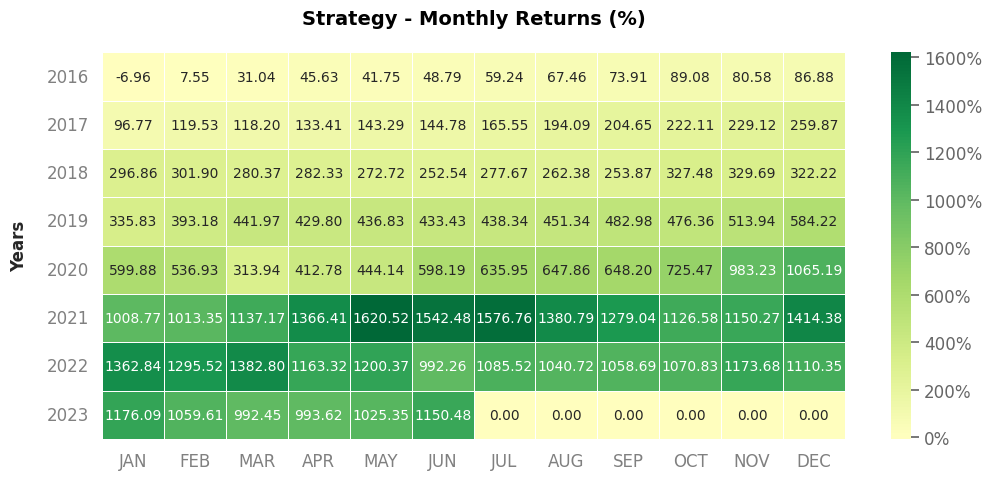

In [141]:
rentabilidade_por_carteiras['modelo'].plot_monthly_heatmap()

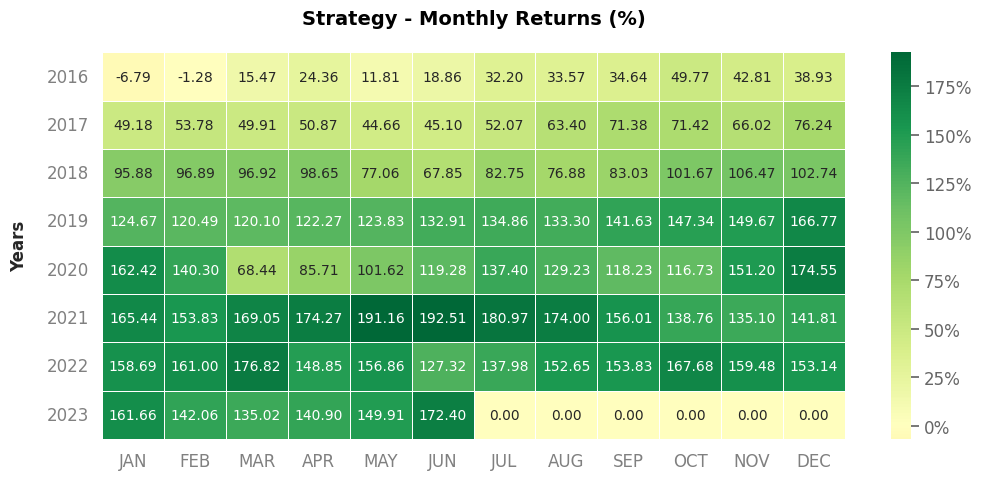

In [142]:
rentabilidade_por_carteiras['ibovespa'].plot_monthly_heatmap()

<Axes: xlabel='data'>

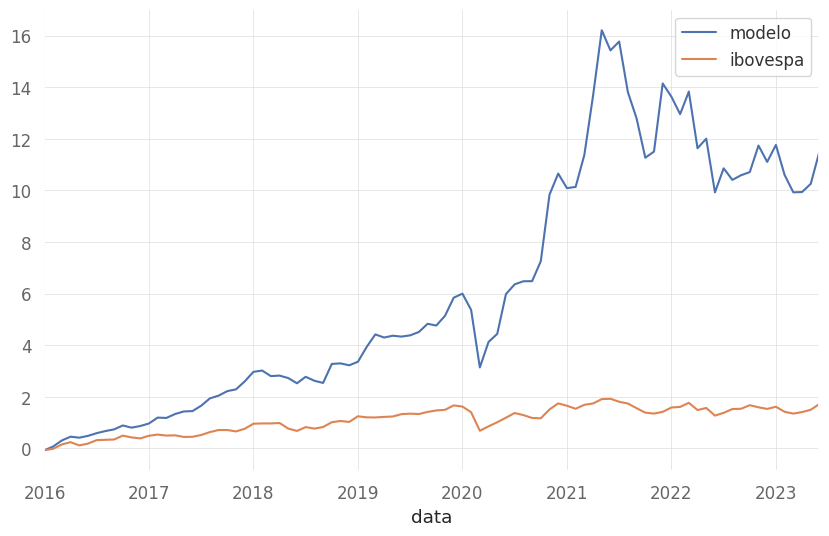

In [143]:
rentabilidade_por_carteiras.plot()

In [144]:
rentabilidade_ao_ano = (1 + rentabilidade_por_carteiras.loc['2023-06-30', 'modelo']) ** (1/7.5) - 1

rentabilidade_ao_ano

0.40047940152735406